In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.models as tfm

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

In [9]:
def VGG16 (input_shape , num_of_labels):
    model = tfm.Sequential()

    model.add(tfl.Conv2D(64, (3, 3), padding='same',activation='relu', input_shape=(28,28,1), strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(64, (3, 3), padding='same',activation='relu' , strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.MaxPool2D((2,2) , strides = (2, 2)))

    model.add(tfl.Conv2D(128, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(128, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.MaxPool2D((2,2) , strides = (2, 2)))

    model.add(tfl.Conv2D(256, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(256, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(256, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.MaxPool2D((2,2) , strides = (2, 2)))

    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.MaxPool2D((2,2) , strides = (2, 2)))

    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Conv2D(512, (3, 3), padding='same',activation='relu', strides = 1))
    model.add(tfl.BatchNormalization())
    model.add(tfl.Flatten())

    model.add(tfl.Dense(4096 , activation='relu'))
    model.add(tfl.Dense(4096 , activation='relu'))

    model.add(tfl.Dense(num_of_labels , activation='softmax'))

    return model


In [10]:
VGG_model = VGG16(input_shape=x_train[0].shape , num_of_labels=len(np.unique(y_train)))
VGG_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
VGG_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

In [11]:
VGG_model.fit(x_train, y_train, epochs=10   , validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 86s 37ms/step - loss: 0.2971 - accuracy: 0.9315 - val_loss: 0.1559 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2429 - accuracy: 0.9531 - val_loss: 0.0451 - val_accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1210 - accuracy: 0.9744 - val_loss: 0.0642 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0781 - accuracy: 0.9836 - val_loss: 0.0420 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0797 - accuracy: 0.9833 - val_loss: 0.0484 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0582 - accuracy: 0.9876 - val_loss: 0.0414 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0468 - accuracy: 0.9904 - val_loss: 0.0413 -

313/313 [==============================] - 3s 8ms/step


<Axes: >

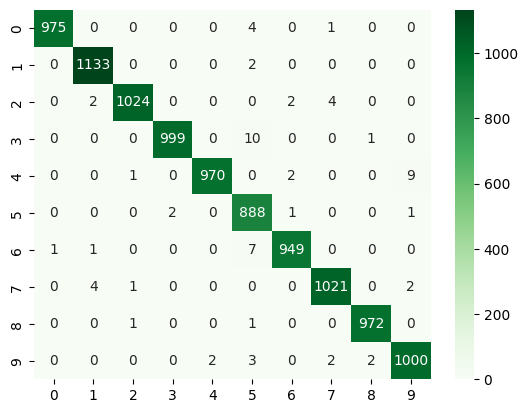

In [12]:
y_test_pred_vgg = np.argmax(VGG_model.predict(x_test) , axis=1)
convmat_vgg = confusion_matrix(y_test , y_test_pred_vgg)
sns.heatmap(convmat_vgg , annot=True , fmt='d',cmap = 'Greens')

In [13]:
print(classification_report(y_test , y_test_pred_vgg))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
